# Practice 3: Regression with housing data

Use this notebook as the starting point for Practice 3 activities.

Student Name: ___________




 This notebook makes use of the [House Sales in King County](https://www.kaggle.com/harlfoxem/housesalesprediction) data set from Kaggle.



## Setting up Python tools



We'll use three libraries for this tutorial: 
- [pandas](http://pandas.pydata.org/) : dataframes for spreadsheet-like data analysis, reading CSV files, time series
- [numpy](http://www.numpy.org/) : for multidimensional data and linear algebra tools
- [matplotlib](http://matplotlib.org/) : Simple plotting and graphing
- [seaborn](http://stanford.edu/~mwaskom/software/seaborn/) : more advanced graphing




In [0]:
# First, we'll import pandas and numpy, two data processing libraries
import pandas as pd
import numpy as np

# We'll also import seaborn and matplot, twp Python graphing libraries
import seaborn as sns
import matplotlib.pyplot as plt
#sns.set(style="white", color_codes=True)

# We will turn off some warns in this notebook to make it easier to read for new students
import warnings
warnings.filterwarnings('ignore')

In [0]:
# Read in the data file from stored in a raw file in GitHub
#url_500 = 'https://raw.githubusercontent.com/CIS3115-Machine-Learning-Scholastica/CIS3115ML-Units3and4/master/stackovreflow_salary_survey_500.csv'
url_1000 = 'https://raw.githubusercontent.com/CIS3115-Machine-Learning-Scholastica/CIS3115ML-Units3and4/master/kc_house_data_1000.csv'
url_250 = 'https://raw.githubusercontent.com/CIS3115-Machine-Learning-Scholastica/CIS3115ML-Units3and4/master/kc_house_data_250.csv'

house_df = pd.read_csv(url_1000)
# Set the Id column as the index since it is unique for each flower
house_df.set_index('id', inplace=True)

In [66]:
house_df.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_lot15
id,,,,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,98178,5650
6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,98125,7639
5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,98028,8062
2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,98136,5000
1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,98074,7503


In [0]:
# Dropping some of the unneeded columns
house_df = house_df.drop(['date', 'lat', 'long', 'sqft_living15', 'sqft_living15', 'yr_renovated'],axis=1)

## Correlation

When we can use one value to predict another value in a dataset, we call this a correlation.  In a scatter plot of the two values, we can see a slope, clusters, or other relationship between the two.

The simplest relationship is a linear relationship which can be defined by a straight line.

The strength of correlation is measured by the [correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient). This is a number betwee -1 and +1. When this coefficient is zero or near zero, then the two values are nor linearly related. When the coefficient is closer to -1 or +1, then the two values are strongly correlated.

![Correlation coeffiecient image](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/640px-Correlation_examples2.svg.png)

*DenisBoigelot, original uploader was Imagecreator [CC0], from [Wikimedia Commons](https://commons.wikimedia.org/wiki/File:Correlation_examples2.svg)*

### House size vs price
One would expect larger houses to cost more. One measure of a house's size is the square-feet of living space. A freshman dormroom as St. Scholasitca is 9'x17' or 153 sq ft. A tyical house might be somewhere between 500 sq ft and 5,000 sq ft.

The graph below shows each house as a dot, with the square feet along the x-axis and the price along the y-axis.

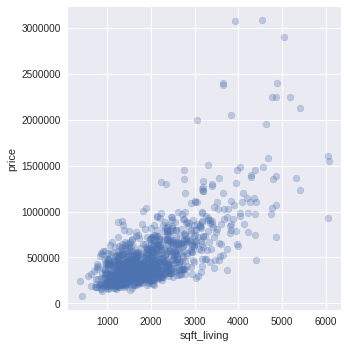

In [33]:
sns.FacetGrid(house_df, size=5) \
   .map(plt.scatter, "sqft_living", "price", alpha=.3)


We can see a general trend that house get more expensive as they get larger. Looking at the graph, small houses with around 800 sq ft cost less than \$500,000. Large house with 3,500 sq ft might cost between \$500,000 - \$1,500,000.

We can use a method called **linear regression** to calculate this relationship--shown by the line in the graph below.

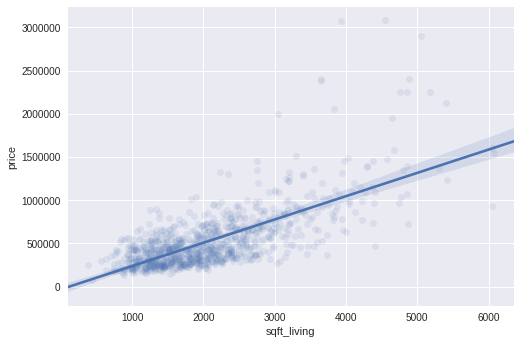

In [34]:
sns.regplot(x=house_df["sqft_living"], y=house_df["price"], scatter_kws={'alpha':0.1})

## Task 1: Understanding Correlation and Regression

With the linear regression line drawn above, we would estimate an average house with 2,000 sq ft would cost about $500,000.

- Question 1: What would you estimate the average 4,000 sq ft house would cost?

- Question 2: What would you estimate the average 6,000 sq ft house would cost?

![alt text](https://raw.githubusercontent.com/CIS3115-Machine-Learning-Scholastica/CIS3115ML-Units3and4/master/800px-Correlation_examples2.svg.png)

Assume the correlation graph of square foot to house price followed one of the above graphs each showing a different correlation coefficient. 

- Question 3: Would it be easier to estimate a value of a house if the correlation coefficient was 0.8 or 0.0? the correlation coefficient was -0.8 or +0.8? Include in your answer a description of why people often ignore the sign in the correlation coefficient.
  
---
*Double-click on this cell to put your answer here...*



## Linear Regression Model

We will now set up linear regression model and train it to predict house prices.

We will use the [scikit-learn](https://scikit-learn.org/stable/index.html) (sklearn) library for our [regression model](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html)

When we use machine learning models, we will general use these variables
- X will be the input data, in this case the size of the house in square feet.
- y will be the out data or what we want to predict, in this case the house price.

One way to this of this, is that on the graphs above the x-axis is the house size and the y-axis is the price.

We create a regression model and then use the data to train or fit the regression to the data. 

In [67]:

from sklearn import linear_model

X = house_df['sqft_living'].values.reshape(-1, 1) 
y = house_df['price'].values

# Create linear regression object
regression_model = linear_model.LinearRegression()

# Train the model using the training sets
regression_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Prediction
Once we have trained or fit the model to the data, we can use it to make predictions.

Here we will predict the house price for a 2,000 square foot house. The prediction will be about $500,000 though it will not be formatted clearly below.

In [68]:
prediction = regression_model.predict([[3000]])
print ("Predicted house value is ", prediction)


Predicted house value is  [776329.64178447]


## Bonus Challenge: Format the prediction

Can you add code to the printout above that formats the predictions to display something like "$506,677.70"? 

Here is a quick tutorial from Python Guru on [Python String Formatting](https://thepythonguru.com/python-string-formatting/). Notice that `predict()` returns a list of one element, so to access the prediction you need to use `prediction[0]`. 

*This is optional, you can skip to the next task below if you want.*

## Task 2: Predictions with Regression

- Question : Using the regression_model above, generate predictions for a 4,000 sq ft house and a 6,000 sq ft house. Compare these predicitons to what you estimated in Task 1.

  
---
*Double-click on this cell to put your answer here...*

## Testing predictions
How do we tell if our predictions are accurate? We would need a set of test data where we know the house size and the price. Then we can try to predict the price for each test house and measure how far from the actual price we were.

To do this, we will go back to our original data and split it into a training set and a testing set. We will use the training set to build out model and then only use the testing set to measure how accurate our model is. We probaly want to randomly select houses to use for testing, rather than just grabbing the first or last 100 houses, in case the houses are in some order.

Since this random Train-Test split is done frequently it is built into sklearn library.



In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Now we have four variables:

- X_train : The house sizes used for training the model
- X_test : The house sizes used for testing the model
- y_train : The prices used for training the model
- y_test : The prices used for testing the model

We will only use the training data for fitting the model.

In [74]:
# Train the model using the training sets
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [75]:
score = regression_model.score(X_test, y_test)
print ("The score is ", score)

The score is  0.47278104702397505


### Score evaluation

Regression models are scored with the coefficient of determination R^2 of the prediction. The higher the score the better. A score of 1.0 is the best score while a score of 0.0 is very bad.

Our model should scored between **0.45 and 0.49 **which is OK, but not great.

## Task 3: Improve model  

In the model above we used the size of the house, `sqft_living`, to train the model and got a score of 0.49.

### Part 1:
You must try two different features and see if they improve the score of the model. You can choose between the following to use instead of `sqft_living`

 - bedrooms
 - bathrooms
 - sqft_living
 - sqft_lot
 - floors
 - condition
 - grade
 - sqft_above
 - sqft_basement
 - yr_built
 - zipcode 
 
You can make your changes in the two code cells below.

### Part 2:

In full sentences, try to describe what the code in the first cell below does. Include a description of what each line of code does and why it is important. 

---
*Put your code description here*

In [76]:
# Trial 1 of a new variable
# replace 'sqft_living' with the parameter of your choice
X = house_df['zipcode'].values.reshape(-1, 1) 
y = house_df['price'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Train the model using the training data
regression_model.fit(X_train, y_train)
# Score the model with the test data
score = regression_model.score(X_test, y_test)
print ("The score is ", score)

The score is  -0.012061977531196533


In [41]:
# Trial 2 of a new variable
# replace 'sqft_living' with the parameter of your choice
X = house_df['sqft_living'].values.reshape(-1, 1) 
y = house_df['price'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Train the model using the training data
regression_model.fit(X_train, y_train)
# Score the model with the test data
score = regression_model.score(X_test, y_test)
print ("The score is ", score)

The score is  0.4388755770874106


## Bonus Challenge - Use the correlation to choose parameters

You can use the correlation graphs or the correlation coefficients to help you select what features to use to predict the house price.

The first chart shows all the correlation coefficients. The first row or column shows the correlations with price. You should be looking for features with high positive or negative values  

The second set of scatter charts show the correlation between the different variables. Again the first row or column shows the correlations with the house price.



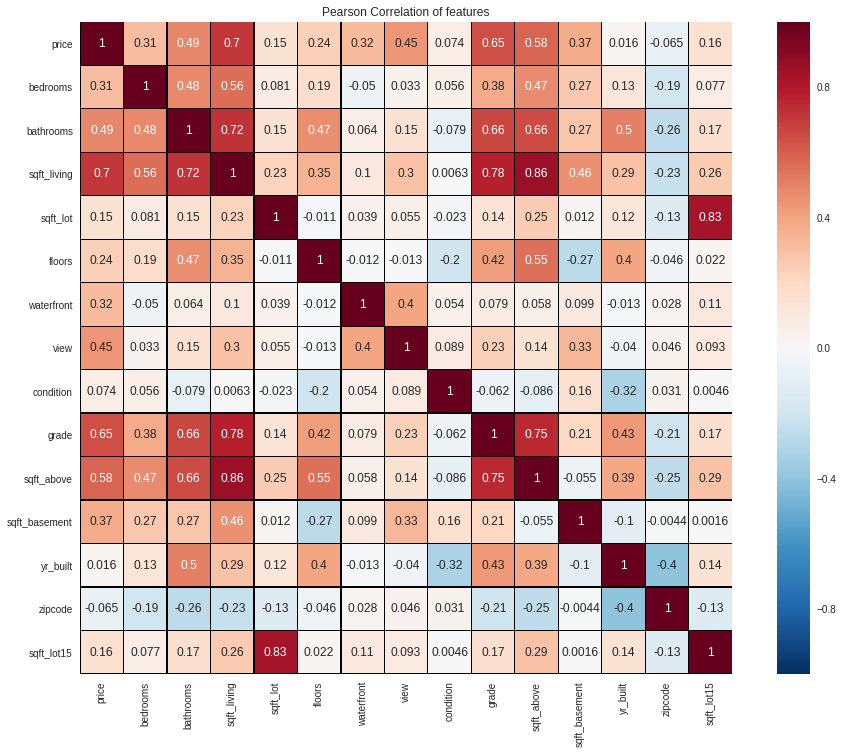

In [43]:
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation of features')
sns.heatmap(house_df.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, linecolor='k', annot=True)

In [77]:
sns.pairplot(house_df, size=3, diag_kind="kde")

Output hidden; open in https://colab.research.google.com to view.

 ### Multi-dimensional linear regression
After looking at the correlations above, select 3-4 features to use in a new multi-dimensional linear regression. This version uses a list of features which you can modify 

```
params = ['sqft_living', 'floors', 'waterfront']
```
So modify this line in the code cell below and try to improve the model's score.


In [78]:
# Trial of multiple variables for the regressions
# replace 'sqft_living' with the parameter of your choice
params = ['sqft_living', 'floors', 'waterfront']
X = house_df[params].values.reshape(-1, len(params)) 
y = house_df['price'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Train the model using the training data
regression_model.fit(X_train, y_train)
# Score the model with the test data
score = regression_model.score(X_test, y_test)
print ("The score is ", score)

The score is  0.518156066870927


## Using all the features 

If combining more than one feature can improve the predictions from linear regression, why don't we just use all of them?

The following cell copies all the features in the `house_df` dataframe into a new dataframe named `features_df`. This is used to train the linear regression model. 



In [80]:
# Trial using all the features
# features_df = house_df
features_df = house_df.drop('price', axis=1)

X = features_df.values.reshape(-1, features_df.shape[1]) 
y = house_df['price'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Train the model using the training data
regression_model.fit(X_train, y_train)
# Score the model with the test data
score = regression_model.score(X_test, y_test)
print ("The score is ", score)

The score is  0.670236363385723


## Task 4: Final Regression Model

### Part 1: Finding the error

When the code above runs using all the features it scores 1.0 which means it can perfectly predict the house price given the features. This does not seem possible...


---

*Describe here why you think a model should not be able to predict with 100% accruacy the house price from the house features. *


---


### Part 2: Fixing the error

When the code above runs it includes the price in the features used to predict the price. This is an error--we don't want to give the model the price if we are asking it to predict the price.  

So change this line 

```
features_df = house_df
```

to this 

```
features_df = house_df.drop('price', axis=1)
```

The `drop` method will remove the price from the `features_df` dataframe and train the model using all the remaining features.

Run the fixed code three times, noting the score each time.


---

*Write the three scores from the final version here.*

*Also, describe why you are getting slightly different answers each time. Where does the randomness come from in this model?*


## Wrapping Up

Remember to share this sheet with your instructor and submit a link to it in Blackboard.